<a href="https://colab.research.google.com/github/riteshch123/Project-Semi-Supervised-GAN-for-Image-Classification/blob/main/CNN_%26_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 'drive/My Drive/fashion-mnist-master'

/content/drive/My Drive/fashion-mnist-master


In [ ]:
ls -l

total 142837
-rw------- 1 root root       485 May 22  2020 app.py
drwx------ 2 root root      4096 Jun 17  2020 benchmark/
-rw------- 1 root root      2705 May 22  2020 configs.py
-rw------- 1 root root      1559 May 22  2020 CONTRIBUTING.md
drwx------ 2 root root      4096 Jun 17  2020 data/
drwx------ 2 root root      4096 Jun 17  2020 doc/
-rw------- 1 root root       401 May 22  2020 Dockerfile
-rw------- 1 root root      1109 May 22  2020 LICENSE
-rw------- 1 root root        71 May 22  2020 MAINTAINERS
-rw------- 1 root root     23551 May 22  2020 README.ja.md
-rw------- 1 root root     22028 May 22  2020 README.md
-rw------- 1 root root     23034 May 22  2020 README.zh-CN.md
-rw------- 1 root root        36 May 22  2020 requirements.txt
drwx------ 2 root root      4096 Jun 17  2020 static/
-rw------- 1 root root  20880506 Jul 19  2020 test_features.npz
-rw------- 1 root root 100224506 Jul 19  2020 train_features.npz
drwx------ 2 root root      4096 Jun 17  2020 utils/
-rw-------

In [ ]:
import numpy as np
import pandas as pd

# Input data files are available in the "data/" directory.
# For example, running this will list the files in the input directory
from subprocess import check_output
print(check_output(["ls", "data/fashion"]).decode("utf8"))

CNN-1Conv.ipynb
fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz
train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz



In [ ]:
# Import libraries
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('data/fashion/fashion-mnist_train.csv')
data_test = pd.read_csv('data/fashion/fashion-mnist_test.csv')

In [ ]:
# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [ ]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

## 1-Conv CNN

In [ ]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

In [ ]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.5473 - accuracy: 0.8111 - val_loss: 0.3923 - val_accuracy: 0.8662
Epoch 2/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.3569 - accuracy: 0.8749 - val_loss: 0.3400 - val_accuracy: 0.8823
Epoch 3/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.3120 - accuracy: 0.8900 - val_loss: 0.3205 - val_accuracy: 0.8838
Epoch 4/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.2881 - accuracy: 0.8979 - val_loss: 0.3021 - val_accuracy: 0.8913
Epoch 5/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.2684 - accuracy: 0.9037 - val_loss: 0.2839 - val_accuracy: 0.8984
Epoch 6/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.2511 - accuracy: 0.9106 - val_loss: 0.2750 - val_accuracy: 0.9011
Epoch 7/10
48000/48000 [==============================] - 1s 26us/s

In [ ]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.24012787722945214
Test accuracy: 0.9147999882698059


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# get the predictions for the test data
predicted_classes = cnn1.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))
print(confusion_matrix(y_true, predicted_classes))

              precision    recall  f1-score   support

     Class 0       0.83      0.91      0.87      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.89      0.86      0.87      1000
     Class 3       0.92      0.95      0.93      1000
     Class 4       0.89      0.86      0.88      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.77      0.72      0.75      1000
     Class 7       0.96      0.94      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.93      0.98      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[910   0  10   7   0   0  65   1   7   0]
 [  3 983   2   9   0   0   3   0   0   0]
 [ 16   1 858  14  53   0  56   0   2   0]
 [ 15   6   4 947  12   0  16   0   0   0]
 [  2   0  38  28 863   0  68   0   1   0]
 [  0   1   0   0   0 964 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


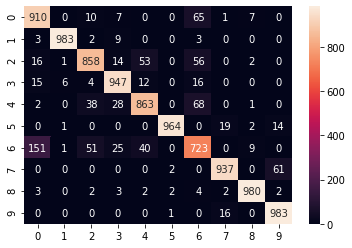

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true,predicted_classes),annot=True,fmt="d")

## 3-Conv CNN

In [ ]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

In [ ]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)        

In [ ]:
history3 = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.8947 - accuracy: 0.6650 - val_loss: 0.5481 - val_accuracy: 0.7957
Epoch 2/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.5507 - accuracy: 0.7939 - val_loss: 0.4516 - val_accuracy: 0.8253
Epoch 3/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.4856 - accuracy: 0.8200 - val_loss: 0.4100 - val_accuracy: 0.8468
Epoch 4/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.4350 - accuracy: 0.8381 - val_loss: 0.3704 - val_accuracy: 0.8657
Epoch 5/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.4004 - accuracy: 0.8525 - val_loss: 0.3397 - val_accuracy: 0.8762
Epoch 6/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.3777 - accuracy: 0.8625 - val_loss: 0.3224 - val_accuracy: 0.8827
Epoch 7/10
48000/48000 [==============================] - 2s 39us/st

In [ ]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.2608607758760452
Test accuracy: 0.9047999978065491


In [ ]:
# get the predictions for the test data
predicted_classes = cnn3.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))
print(confusion_matrix(y_true, predicted_classes))

              precision    recall  f1-score   support

     Class 0       0.84      0.87      0.86      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.87      0.86      0.86      1000
     Class 3       0.93      0.90      0.92      1000
     Class 4       0.80      0.90      0.85      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.75      0.67      0.71      1000
     Class 7       0.96      0.94      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[867   1  18  19   3   1  83   0   8   0]
 [  0 980   1  10   3   1   5   0   0   0]
 [  7   1 859   7  67   0  52   0   7   0]
 [ 15   5   9 903  43   0  25   0   0   0]
 [  0   1  31  16 898   1  52   0   1   0]
 [  0   0   0   0   0 974 

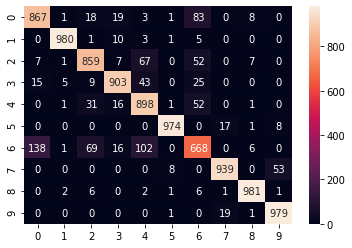

In [ ]:
sns.heatmap(confusion_matrix(y_true,predicted_classes),annot=True,fmt="d")

## 4-Conv CNN

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))

In [ ]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)       

In [ ]:
history4 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 169us/step - loss: 0.7500 - accuracy: 0.7417 - val_loss: 3.0290 - val_accuracy: 0.1442
Epoch 2/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.4365 - accuracy: 0.8441 - val_loss: 1.6783 - val_accuracy: 0.5626
Epoch 3/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.3616 - accuracy: 0.8718 - val_loss: 0.4747 - val_accuracy: 0.8331
Epoch 4/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.3277 - accuracy: 0.8837 - val_loss: 0.3225 - val_accuracy: 0.8854
Epoch 5/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.2999 - accuracy: 0.8923 - val_loss: 0.2704 - val_accuracy: 0.9036
Epoch 6/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.2786 - accuracy: 0.9004 - val_loss: 0.3039 - val_accuracy: 0.8953
Epoch 7/10
48000/48000 [==============================] - 7s 1

In [ ]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.24785914738178252
Test accuracy: 0.9090999960899353


In [ ]:
# get the predictions for the test data
predicted_classes = cnn4.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))
print(confusion_matrix(y_true, predicted_classes))

              precision    recall  f1-score   support

     Class 0       0.94      0.76      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.94      0.77      0.85      1000
     Class 3       0.90      0.94      0.92      1000
     Class 4       0.83      0.89      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.67      0.86      0.76      1000
     Class 7       0.94      0.97      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

[[757   0  11  32   1   1 193   0   5   0]
 [  0 990   0   6   2   0   2   0   0   0]
 [  5   1 768  13 113   0  98   0   2   0]
 [  4   2   1 938  25   0  30   0   0   0]
 [  0   0   5  19 891   0  85   0   0   0]
 [  0   0   0   0   0 968 

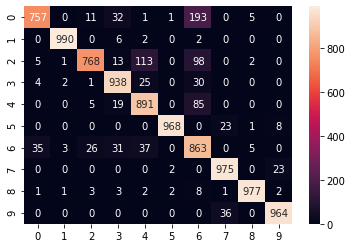

In [ ]:
sns.heatmap(confusion_matrix(y_true,predicted_classes),annot=True,fmt="d")

## VGG-19

In [ ]:
# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [ ]:
# Convert the training and test images into 3 channels
X = np.dstack([X] * 3)
X_test = np.dstack([X_test]*3)

# Display their new shapes
X.shape, X_test.shape

((60000, 784, 3), (10000, 784, 3))

In [ ]:
# Reshape images as per the tensor format required by tensorflow
X = X.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)

# Display the new shape
X.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
# Resize the images as 150 * 150 as required by VGG19
from keras.preprocessing.image import img_to_array, array_to_img

X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((96,96))) for im in X])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((96,96))) for im in X_test])

# Display the new shape
X.shape, X_test.shape

In [ ]:
# Normalise the data and change data type
X = X.astype('float32')
X /= 255

X_test = X_test.astype('float32')
X_test /= 255

In [ ]:
from sklearn.model_selection import train_test_split

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Check the data size whether it is as per tensorflow and VGG19 requirement
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [ ]:
from keras.applications import VGG19

# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (48, 48, 3), classes = 10)

80142336/80134624 [==============================] - 7s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
from keras.applications.vgg19 import preprocess_input

# Preprocessing the input 
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [ ]:
# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size=256, verbose=1)
val_features = vgg19.predict(np.array(X_val), batch_size=256, verbose=1)

12000/12000 [==============================] - 6s 483us/step


In [ ]:
# Saving the features so that they can be used for future
np.savez("train_features", train_features, y_train)
np.savez("test_features", test_features, y_test)
np.savez("val_features", val_features, y_val)

In [ ]:
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [ ]:
train_features = np.reshape(train_features, (48000, 1*1*512))
test_features = np.reshape(test_features, (10000, 1*1*512))
val_features = np.reshape(val_features, (12000, 1*1*512))

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim = 1 * 1 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

In [ ]:
import keras

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_features, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(val_features, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 17us/step - loss: 2.4586 - accuracy: 0.2699 - val_loss: 1.7403 - val_accuracy: 0.4618
Epoch 2/50
48000/48000 [==============================] - 1s 15us/step - loss: 1.6365 - accuracy: 0.4152 - val_loss: 1.5089 - val_accuracy: 0.4917
Epoch 3/50
48000/48000 [==============================] - 1s 15us/step - loss: 1.4772 - accuracy: 0.4704 - val_loss: 1.3685 - val_accuracy: 0.5337
Epoch 4/50
48000/48000 [==============================] - 1s 15us/step - loss: 1.3886 - accuracy: 0.5040 - val_loss: 1.3156 - val_accuracy: 0.5692
Epoch 5/50
48000/48000 [==============================] - 1s 15us/step - loss: 1.3165 - accuracy: 0.5277 - val_loss: 1.2476 - val_accuracy: 0.5647
Epoch 6/50
48000/48000 [==============================] - 1s 15us/step - loss: 1.2703 - accuracy: 0.5427 - val_loss: 1.2133 - val_accuracy: 0.5791
Epoch 7/50
48000/48000 [==============================] - 1s 15us/st

In [ ]:
score = model.evaluate(test_features, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8774007688522338
Test accuracy: 0.6868000030517578


In [ ]:
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(test_features)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.45      0.82      0.58      1000
     Class 1       0.93      0.91      0.92      1000
     Class 2       0.56      0.43      0.49      1000
     Class 3       0.69      0.74      0.71      1000
     Class 4       0.65      0.45      0.53      1000
     Class 5       0.85      0.83      0.84      1000
     Class 6       0.38      0.33      0.35      1000
     Class 7       0.78      0.84      0.81      1000
     Class 8       0.88      0.69      0.77      1000
     Class 9       0.86      0.84      0.85      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



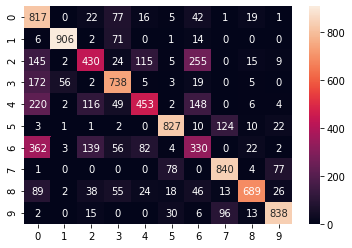

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true,predicted_classes),annot=True,fmt="d")